In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

from rdkit.Chem.Scaffolds import MurckoScaffold

In [2]:
with open('./data/DOWNLOAD-ligands_for_serotonine_rec.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    serotonine_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        pchembl = m['pChEMBL Value']
        if not pchembl:
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) # save the value into mol instance
        serotonine_ligands.append(mol)

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

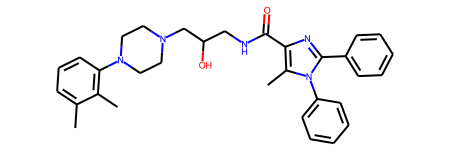

In [3]:
serotonine_ligands[0]

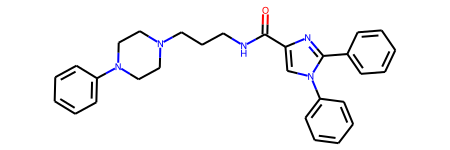

In [4]:
scaffold1 = MurckoScaffold.GetScaffoldForMol(serotonine_ligands[0])
scaffold1

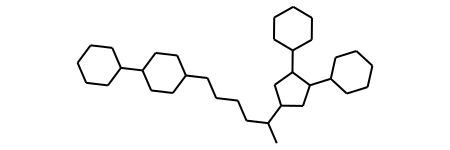

In [5]:
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

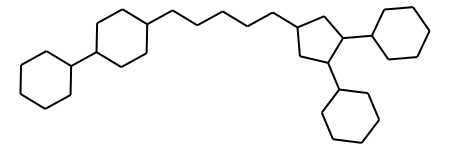

In [6]:
scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
scaffold3

In [7]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff

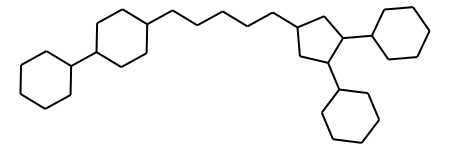

In [8]:
scaffold(serotonine_ligands[0])

In [9]:
scaffolds_drugbank = [scaffold(drug) for drug in drugs]
scaffolds_drugbank[:15]

 None,

In [10]:
scaffolds_smiles_drugbank = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(scaffolds_drugbank) if mol]
scaffolds_smiles_drugbank[:15]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (12, ''),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (15, '')]

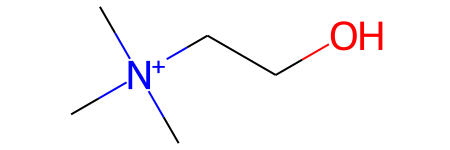

In [11]:
drugs[15]

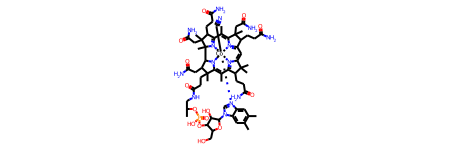

In [12]:
drugs[8]

In [13]:
scaffolds2drugs = {}# {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in scaffolds_smiles_drugbank:
    scaffolds2drugs[scaffoldsmiles] = scaffolds2drugs.get(scaffoldsmiles, []) + [drug_idx]
scaffolds2drugs

{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': [0,
  2060],
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': [1,
  529],
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': [2, 5, 2325],
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': [3,
  4678],
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': [4],
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': [6],
 'C1CCCCC1': [7,
  13,
  27,
  39,
  54,
  56,
  59,
  67,
  72,
  73,
  78,
  81,
  82,
  89,
  102,
  108,
  112,
  123,
  126,
  127,
  131,
  134,
  149,
  154,
  155,
  161,
  171,
  181,
  192,
  196,
  198,
  202,
  206,
  224,
  228,
  234,
  257,
  258,
  268,
  276,
  285,
  305,
  306,
  310,
  315,
  318,
  333,
  336,
  346,
  350,
  361,
  370,
  375,
  376,
  378,
  381,
  386,
  408,
  416,
  429,
  430,
  435,
  443,
  459,
  477,
  479,
  484,
  494,
  495,
  497,
  512,
  514,

In [14]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:15]

(1545,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 3),
  ('C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 1),
  ('C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 1),
  ('C1CCCCC1', 1039),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
  ('C1CCCC1', 188),
  ('C1CCC2C(C1)CCC2C1CCCC1', 165),
  ('', 976),
  ('C1CC2CCCC2C1', 15),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 28),
  ('C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1', 2),
  ('C1CCC2CC3CCCCC3CC2C1', 57)])

In [15]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:15]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 170),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54)]

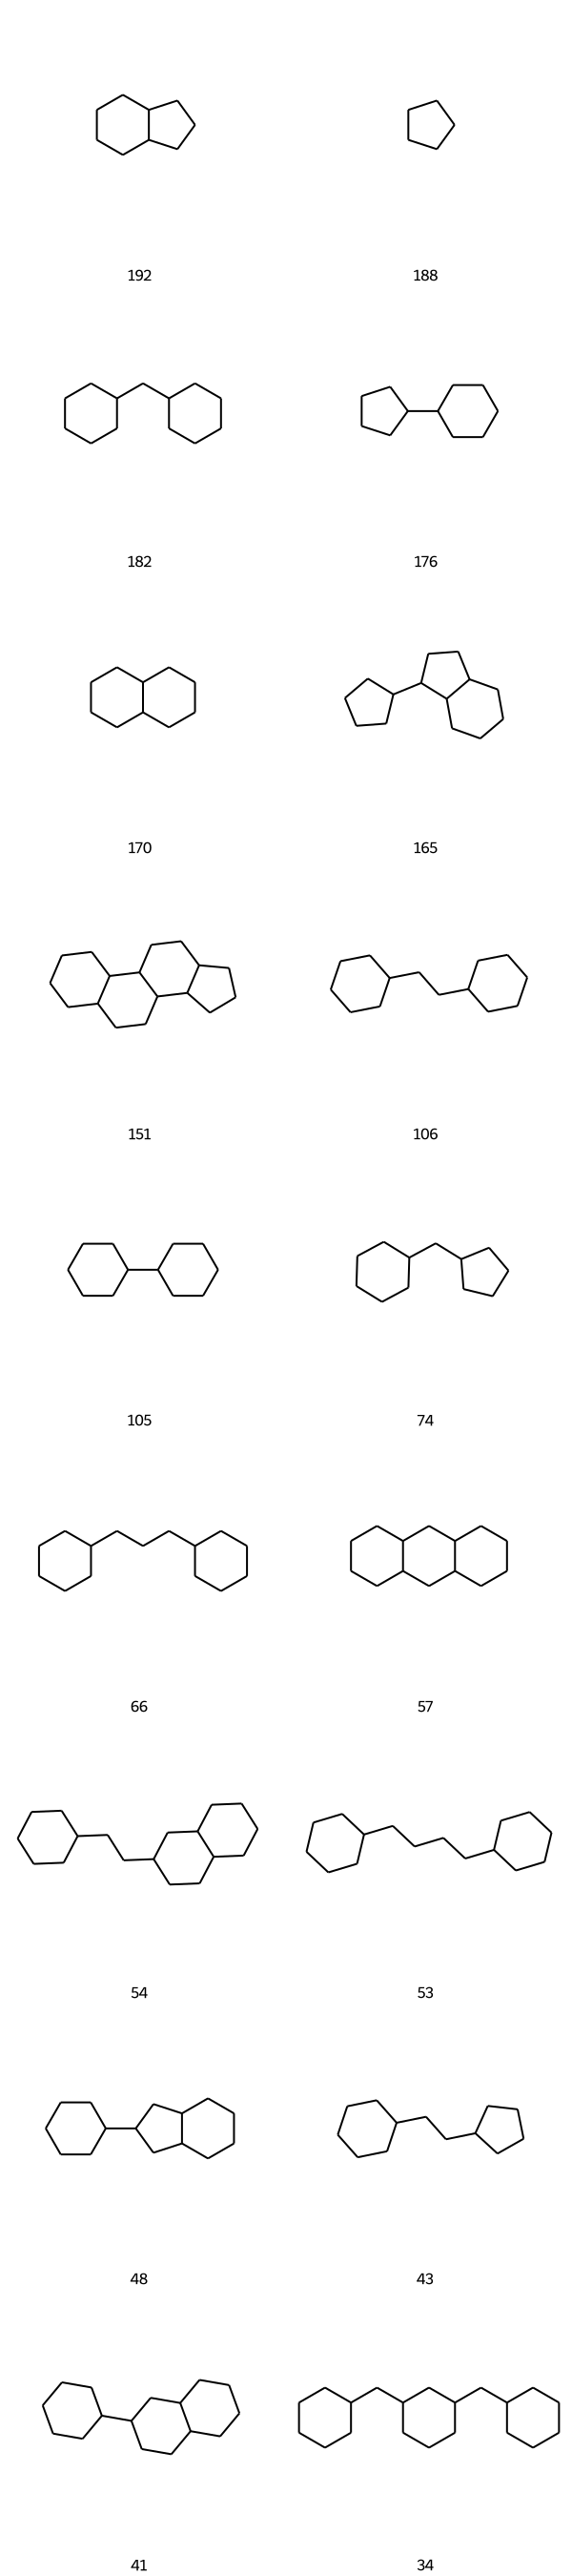

In [19]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[2:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[2:20]])

In [22]:
scaffolds_smiles_serotonine = [(i, Chem.MolToSmiles(scaffold(ligand))) for i, ligand in enumerate(serotonine_ligands)]
scaffolds_smiles_serotonine[:15]

[(0, 'C(CCC1CCC(C2CCCCC2)CC1)CCC1CC(C2CCCCC2)C(C2CCCCC2)C1'),
 (1, 'C1CCC(C2CCC(C3CC4CCCC4C4CCCC34)CC2)CC1'),
 (2, 'C1CCC(CC2CC(C3CCCCC3)CC3CCCCCC32)CC1'),
 (3, 'C1CCC(CCC2CCCCC2)CC1'),
 (4, 'C1CCCC1'),
 (5, 'C(CCC1CCC(C2CCCCC2)CC1)CCC1CCC(C2CCCCC2)C1'),
 (6, 'C1CCC(CC2CCC(C3CC4CCC5CCCCC5C4C4CCCC34)CC2)CC1'),
 (7, 'C1CCC(CCCCCC2C3CCCCC3CC2C2CCCCC2)CC1'),
 (8, 'C1CCC(CC2CCCCC2)CC1'),
 (9, 'C1CCC(CC2CC(C3CCC(C4CCCCC4)CC3)CC3CCCC32)CC1'),
 (10, 'C1CCC(CC2CC(C3CCCCC3)CC3CCCC32)CC1'),
 (11, 'C1CC2CCC2C1'),
 (12, 'C1CCC(CCC2CCC(C3CCCC3)CC2)C1'),
 (13, 'C1CCC(CCC2CC3CCCC3C3CCCC23)CC1'),
 (14, 'C(CCC1CCC(C2CCCCC2)CC1)CCC1CCC(C2CCCCC2)C1')]

In [23]:
scaffolds2ligands = {}
for ligand_idx, scaffoldsmiles in scaffolds_smiles_serotonine:
    scaffolds2ligands[scaffoldsmiles] = scaffolds2ligands.get(scaffoldsmiles, []) + [ligand_idx]
scaffolds2ligands

{'C(CCC1CCC(C2CCCCC2)CC1)CCC1CC(C2CCCCC2)C(C2CCCCC2)C1': [0,
  77,
  419,
  449,
  505,
  588,
  598,
  624,
  626,
  627,
  670,
  679,
  697,
  710,
  752,
  821,
  877,
  1076,
  1124,
  1137,
  1153,
  1186,
  1224,
  1273,
  1347,
  1348,
  1393,
  1400,
  1450,
  1463,
  1631,
  1700,
  1729,
  1799,
  1861],
 'C1CCC(C2CCC(C3CC4CCCC4C4CCCC34)CC2)CC1': [1, 871, 1064, 1078, 1182, 1217],
 'C1CCC(CC2CC(C3CCCCC3)CC3CCCCCC32)CC1': [2, 170, 1142],
 'C1CCC(CCC2CCCCC2)CC1': [3,
  114,
  125,
  153,
  177,
  196,
  214,
  231,
  233,
  236,
  238,
  281,
  302,
  331,
  362,
  421,
  517,
  693,
  712,
  746,
  796,
  874,
  989,
  990,
  1043,
  1058,
  1101,
  1310,
  1311,
  1474,
  1507,
  1590,
  1593,
  1596,
  1636,
  1670,
  1671,
  1684,
  1689,
  1690,
  1697,
  1733,
  1750,
  1773,
  1782,
  1790,
  1856],
 'C1CCCC1': [4,
  213,
  216,
  333,
  390,
  651,
  666,
  809,
  1028,
  1068,
  1166,
  1360,
  1402,
  1419,
  1455,
  1540,
  1641,
  1822,
  1833,
  1834,
  1860],
 'C(

In [24]:
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)
len(scaffold_ligandcount), scaffold_ligandcount[:15]

(468,
 [('C(CCC1CCC(C2CCCCC2)CC1)CCC1CCC(C2CCCCC2)C1', 157),
  ('C1CCCCC1', 131),
  ('', 85),
  ('C1CCC(CCC2CCCCC2)CC1', 47),
  ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 43),
  ('C1CCC2CCCC2C1', 38),
  ('C1CCC2C(C1)CC1CCCCC1C1CCCC21', 37),
  ('C(CCC1CCC(C2CCCCC2)CC1)CCC1CC(C2CCCCC2)C(C2CCCCC2)C1', 35),
  ('C1CCC(CC2CCCCC2)CC1', 28),
  ('C1CCC(CC2CCCC3CCCC32)CC1', 28),
  ('C1CCC2CCCCC2C1', 28),
  ('C1CCC(C2CCCCC2)CC1', 26),
  ('C1CCC(C2CCC(CCC3CCC4CC(CC5CCCC5)CCC4C3)CC2)CC1', 24),
  ('C1CCCC1', 21),
  ('C1CCC(CC2CCC3CCCC3C2)C1', 21)])

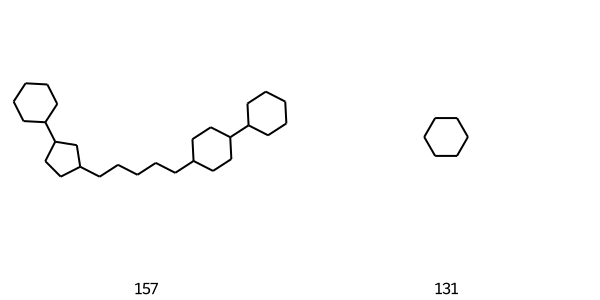

In [26]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:2]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:2]])

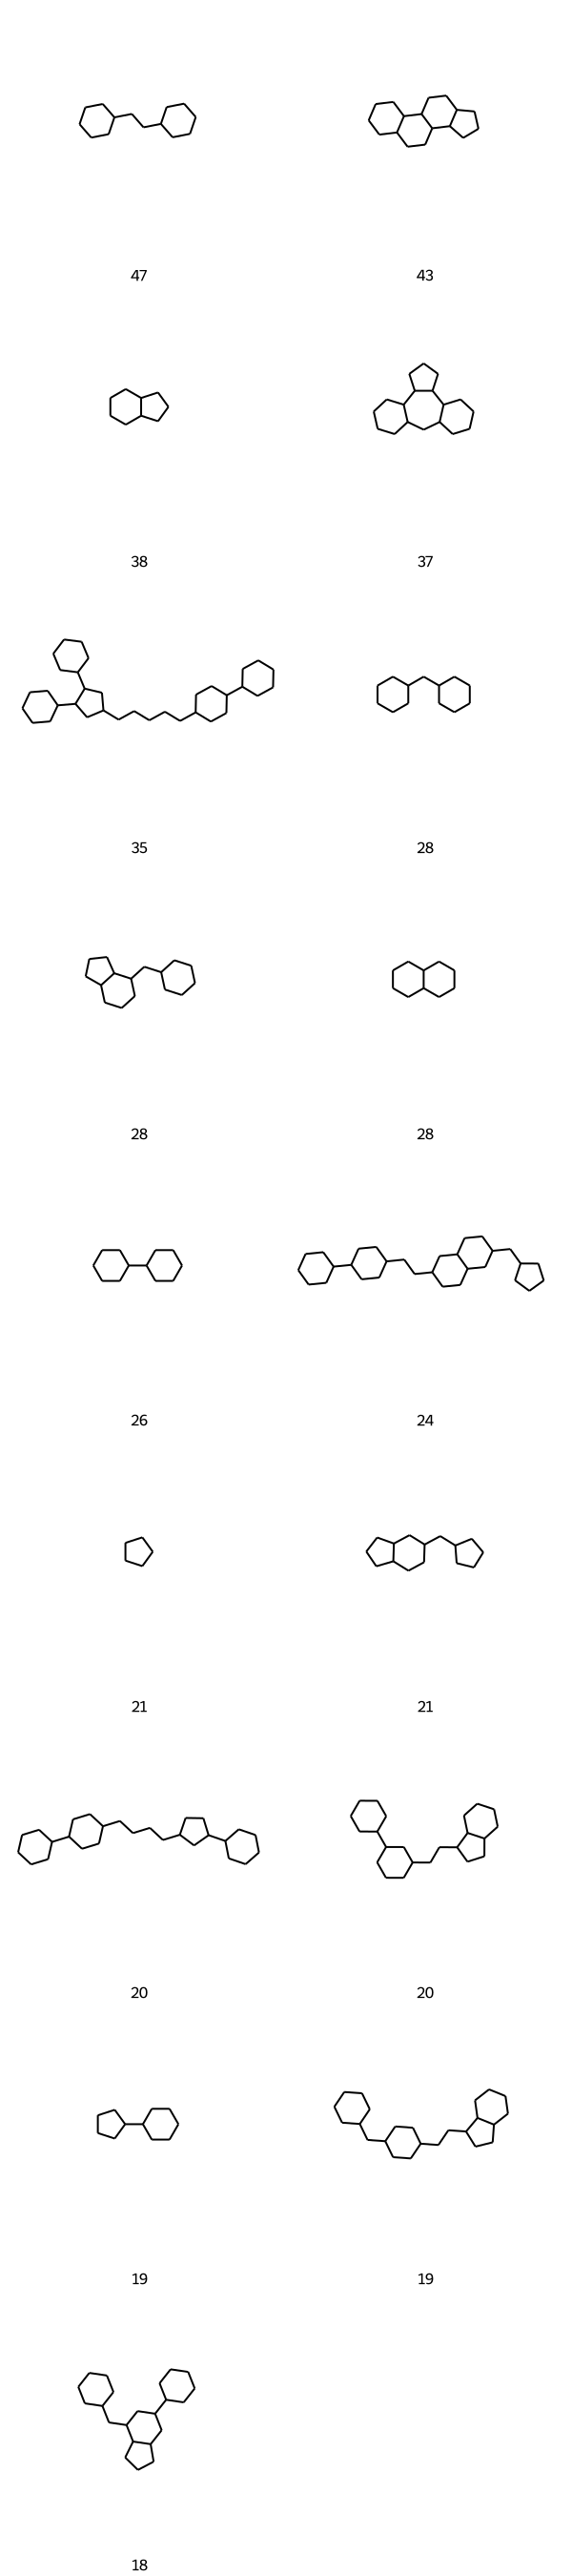

In [25]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[3:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[3:20]])

There are both structures very similar to those in DrugBank (simple rings, steroid core...) and very large scaffolds with long chains connecting multiple rings.

# Diversity picking

In [29]:
scaffold_representatives = {}
for scaffold, ligands in scaffolds2ligands.items():
    scaffold_representatives[scaffold] = sorted(ligands,
                                                key=lambda x: serotonine_ligands[x].GetProp('pChEMBL'),
                                                reverse=True)[0]
len(scaffold_representatives), scaffold_representatives

(468,
 {'C(CCC1CCC(C2CCCCC2)CC1)CCC1CC(C2CCCCC2)C(C2CCCCC2)C1': 752,
  'C1CCC(C2CCC(C3CC4CCCC4C4CCCC34)CC2)CC1': 1078,
  'C1CCC(CC2CC(C3CCCCC3)CC3CCCCCC32)CC1': 170,
  'C1CCC(CCC2CCCCC2)CC1': 1690,
  'C1CCCC1': 4,
  'C(CCC1CCC(C2CCCCC2)CC1)CCC1CCC(C2CCCCC2)C1': 271,
  'C1CCC(CC2CCC(C3CC4CCC5CCCCC5C4C4CCCC34)CC2)CC1': 6,
  'C1CCC(CCCCCC2C3CCCCC3CC2C2CCCCC2)CC1': 235,
  'C1CCC(CC2CCCCC2)CC1': 1029,
  'C1CCC(CC2CC(C3CCC(C4CCCCC4)CC3)CC3CCCC32)CC1': 924,
  'C1CCC(CC2CC(C3CCCCC3)CC3CCCC32)CC1': 671,
  'C1CC2CCC2C1': 11,
  'C1CCC(CCC2CCC(C3CCCC3)CC2)C1': 12,
  'C1CCC(CCC2CC3CCCC3C3CCCC23)CC1': 13,
  'C1CCC(CCC2CCC3CCC(CCC4CCC5CCCC54)CC23)C1': 15,
  'C1CCC(CC2CCC3CCCCC32)CC1': 17,
  'C1CCC(C2CC3CCCCCC3C(C3CCCCC3)C2)CC1': 20,
  'C1CCC(C2CCC3CCCCCC3C2)CC1': 21,
  'C1CCC(C2CC3CCCCCC3C(CCC3CCCC3)C2)CC1': 22,
  'C1CCC(C2CCCC2)CC1': 23,
  'C1CCCCC1': 1093,
  'C1CCC2CCCC2C1': 226,
  'C1CCC(CC2CCCC3CCCC32)CC1': 344,
  'C1CCC(CCCC2(C3CCCCC3)CCCCC2)CC1': 27,
  'C1CCC2CCCCC2C1': 917,
  'C1CCCCCCCCCCCCCC

In [30]:
# prep for our amazing visualization of scaffolds and representative structures side by side :)
scaffold_representatives4visualization = []
for scaffold, ligandcount in scaffold_ligandcount:
    mol = Chem.MolFromSmiles(scaffold)
    mol.SetProp('legend', str(ligandcount) + " ligands")
    scaffold_representatives4visualization.append(mol)
    representative_mol = serotonine_ligands[scaffold_representatives[scaffold]]
    representative_mol.SetProp('legend', 
                    f'#{str(scaffold_representatives[scaffold])} | pChEMBL {representative_mol.GetProp("pChEMBL")}')
    scaffold_representatives4visualization.append(representative_mol)
len(scaffold_representatives4visualization), scaffold_representatives4visualization[:15]

(936,
  <rdkit.Chem.rdchem.Mol at 0x21f13f1a940>])

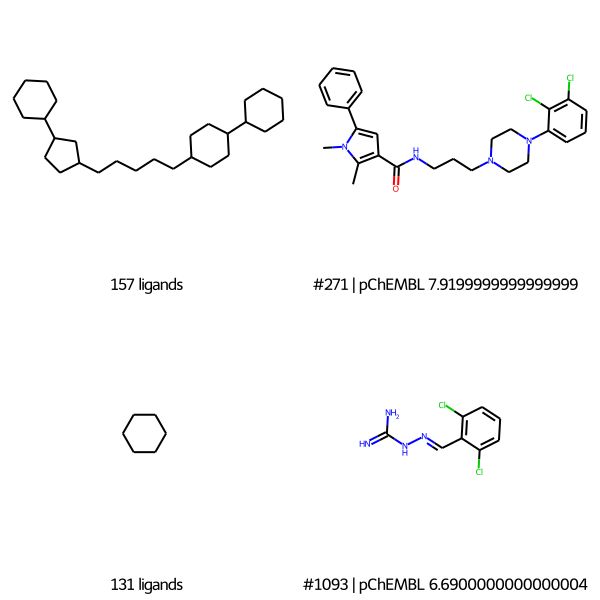

In [45]:
Draw.MolsToGridImage(scaffold_representatives4visualization[:4],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[:4]])

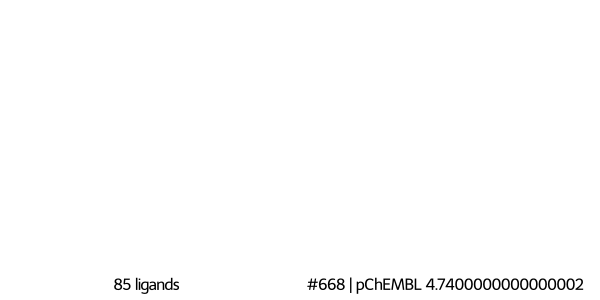

In [43]:
Draw.MolsToGridImage(scaffold_representatives4visualization[4:6],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[4:6]])

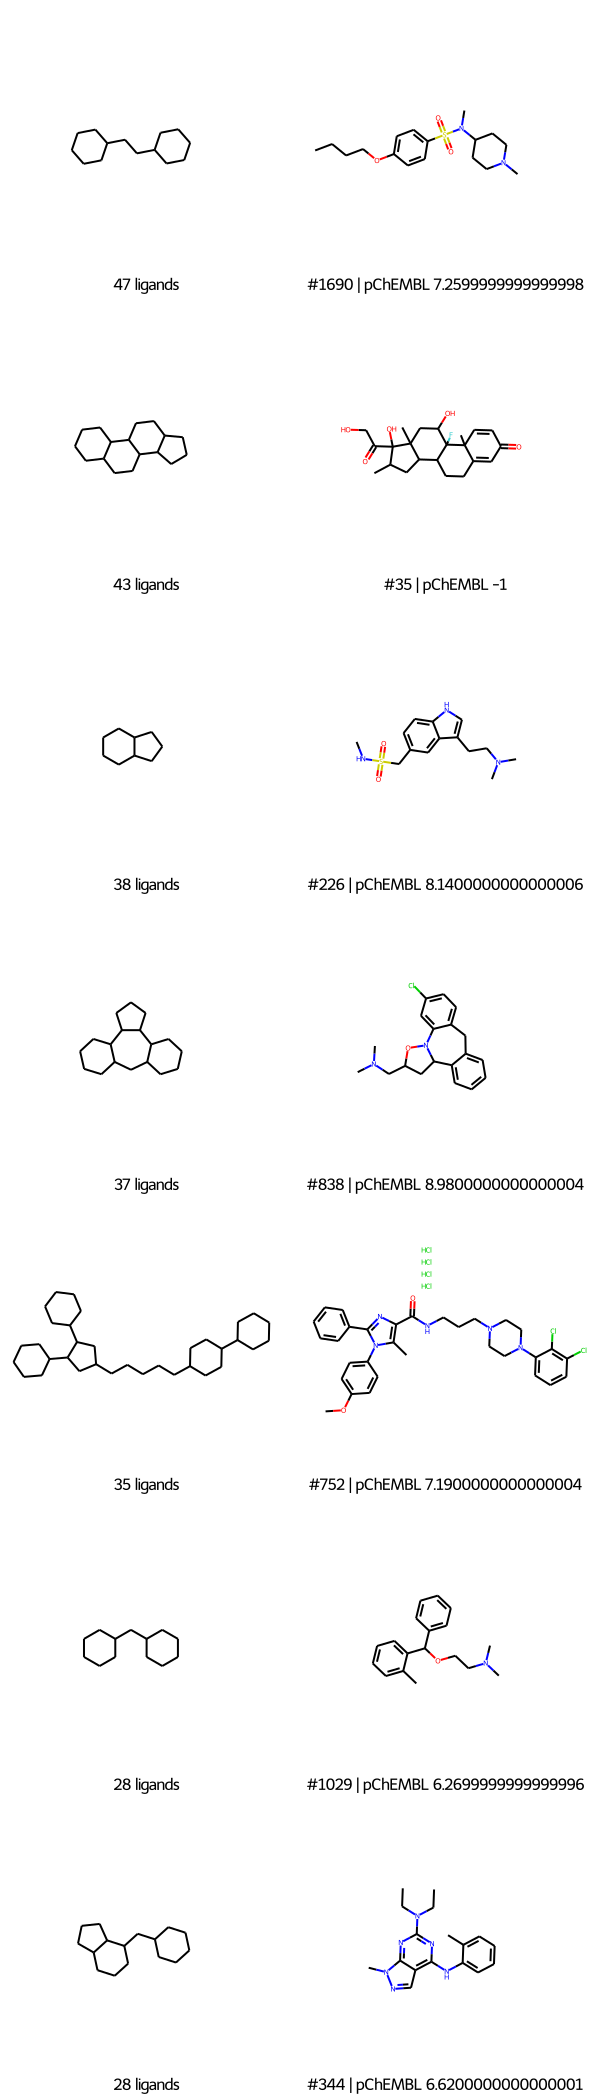

In [46]:
Draw.MolsToGridImage(scaffold_representatives4visualization[6:20],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[6:20]])

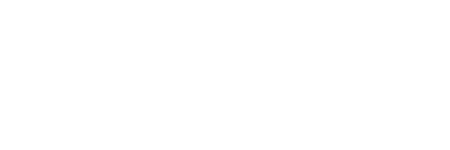

In [47]:
scaffold_representatives4visualization[5]

In [53]:
scaffold_representatives[Chem.MolToSmiles(scaffold_representatives4visualization[4])]

668

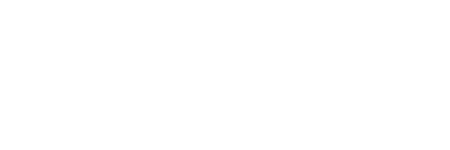

In [54]:
serotonine_ligands[668]